# 텐서플로 첫걸음
* 3장 이어서

In [14]:
# tensor: tensorflow basic data structure => represent any type of data
# dynamic size, multi dimensional data array
# Bool, string, number... static file types.
#
## Rank: number of the dimension of array.

import tensorflow as tf

# points 2000 * 2 array
points = [[0]*2 ]*2000 # [ [element] * cols] * rows
# print(points)
vectors = tf.constant(points)
expended_vectors = tf.expand_dims(vectors,0)

In [15]:
print(vectors)
# print(vectors.get_shape())

Tensor("Const_3:0", shape=(2000, 2), dtype=int32)


In [16]:
print(expended_vectors)

Tensor("ExpandDims_3:0", shape=(1, 2000, 2), dtype=int32)


In [17]:
expended_vectors.get_shape()

TensorShape([Dimension(1), Dimension(2000), Dimension(2)])

In [18]:
# data ...

In [19]:
# data from data file. (MNIST at chapter 4)

In [20]:
# variable and constant

# tf.constant()
# tf.variable()

# need initialize before run() : tf.global_variables_initializer()
#
## tf.train.Saver : save result at the disk

In [21]:
# python code

# first tensorflow code
import tensorflow as tf

# tf.placeholder: symbolic variable. can change value when program is running
a = tf.placeholder("float")
b = tf.placeholder("float")

# Tensor calculation operation
# Tensor: dynmaic  size multi-dimension array
y = tf.multiply(a,b)
# basic operations and matrix operation.

# make session
# sesstion interact with tensorflow library
sess = tf.Session()
# tf.interactionSession : 대화형 환경 (~~ ipython)

# run the session
print(sess.run(y, feed_dict = {a:3, b:3}))

9.0


In [34]:
# K-mean algorithm

# clutering problem
# result: centroid(center of the cluster) dot * K
# NP-hardness problem. => heuristic method... iterative refinement.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

num_points = 2000
vectors_set =[]

for i in range(num_points):
    if np.random.random() > 0.5:
        vectors_set.append([np.random.normal(0.0, 0.9),
                           np.random.normal(0.0, 0.9)])
    else:
        vectors_set.append([np.random.normal(3.0, 0.5),
                           np.random.normal(1.0, 0.5)])
        

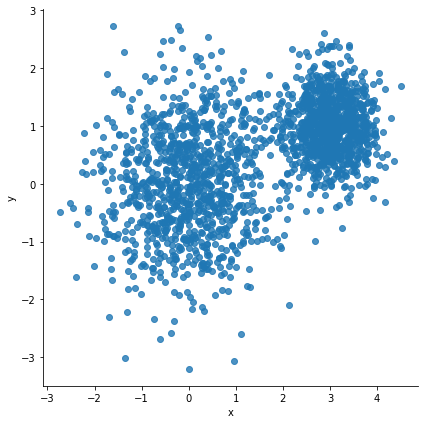

In [35]:
df = pd.DataFrame({"x": [v[0] for v in vectors_set],
                  "y": [v[1] for v in vectors_set]})

sns.lmplot("x", "y", data=df, fit_reg=False, height = 6)
plt.show()

In [40]:
vectors = tf.constant(vectors_set)
num_clusters = 4
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [num_clusters,-1]))

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

print(expanded_vectors.get_shape())
print(expanded_centroids.get_shape())

(1, 2000, 2)
(4, 1, 2)


In [41]:
# centroid index
distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2)
assignments = tf.argmin(distances, 0)

In [42]:
# mean of cluster => get new centroid
means = tf.concat([tf.reduce_mean(
    tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)),[1,-1])),reduction_indices=[1])
  for c in range(num_clusters)], 0)

update_centroids = tf.assign(centroids, means)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [43]:
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

In [45]:
num_steps = 100
for step in range(num_steps):
    # _ means, throw the result. herem update_centroids has no return. however, _ also used as variable.
   _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignments])

print("centroids")
print(centroid_values)

centroids
[[ 2.991573    0.99667895]
 [-0.00673074  0.9582586 ]
 [ 0.70728093 -0.47834092]
 [-0.8900112  -0.5465807 ]]


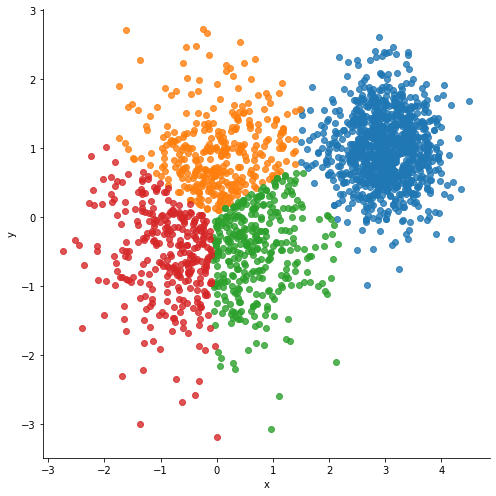

In [48]:
data = {"x": [], "y": [], "cluster": []}
for i in range(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, 
           fit_reg=False, height=7, 
           hue="cluster", legend=False)
plt.show()

In [26]:
%conda list

# packages in environment at C:\Users\MBIS\anaconda3\envs\tensorflow114_py37:
#
# Name                    Version                   Build  Channel
_py-xgboost-mutex         2.0                       cpu_0    anaconda
_tflow_select             2.1.0                       gpu  
absl-py                   0.9.0                    py37_0  
alabaster                 0.7.12                   py37_0  
argh                      0.26.2                   py37_0  
astor                     0.8.0                    py37_0  
astroid                   2.3.3                    py37_0  
atomicwrites              1.4.0                      py_0  
attrs                     19.3.0                     py_0  
autopep8                  1.5.3                      py_0  
babel                     2.8.0                      py_0  
backcall                  0.2.0                      py_0  
bcrypt                    3.1.7            py37he774522_1  
blas                      1.0                         mkl  
ble

pexpect                   4.8.0                    py37_1  
pickleshare               0.7.5                 py37_1001  
pillow                    7.2.0            py37hcc1f983_0  
pip                       20.1.1                   py37_1  
pluggy                    0.13.1                   py37_0  
prometheus_client         0.8.0                      py_0  
prompt-toolkit            3.0.5                      py_0  
prompt_toolkit            3.0.5                         0  
protobuf                  3.12.3           py37h33f27b4_0  
psutil                    5.7.0            py37he774522_0  
py-opencv                 4.4.0            py37h43977f1_2    conda-forge
py-xgboost                0.90                     py37_1    anaconda
pycodestyle               2.6.0                      py_0  
pycparser                 2.20                       py_2  
pydocstyle                5.0.2                      py_0  
pydot                     1.4.1           py37hc8dfbb8_1002    conda-forge
py